EDA for the full df (Not Cleaned)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# df=pd.read_csv("/rds/general/user/hsl121/home/hda_project/rq1/rq1_full_df.csv")
df=pd.read_csv("/rds/general/user/hsl121/home/hda_project/rq1/rq1_cleaned_adverse_binary.csv")

In [3]:
df.columns

Index(['SID', 'EQ5D_Round1', 'EQ5D_Round2', 'EQ5D_Round3', 'EQ5D_Round4',
       'EQ5D_Round5', 'EQ5D_Round6', 'EffectivePrescriptionDate',
       'Product_Prescription1', 'Product_Prescription2',
       'Product_Prescription3', 'Totalquantity_Prescription1',
       'Totalquantity_Prescription2', 'Totalquantity_Prescription3', 'Age',
       'Sex', 'occupation', 'weight', 'height', 'BMI', 'primDiag', 'secDiag',
       'tertDiag', 'Myocardial_infarction', 'Congestive_heart_failure',
       'Peripheral_vascular_disease',
       'Cerebrovascular_accident_or_transient_ischemic_attack', 'Dementia',
       'Chronic_obstructive_pulmonary_disease', 'Connective_tissue_disease',
       'Peptic_Ulcer_Disease', 'Liver_disease', 'Diabetes', 'Hemiplegia',
       'Moderate_to_severe_chronic_kidney_disease', 'Solid_tumour', 'Leukemia',
       'Lymphoma', 'AIDS', 'Charlson_comorbidity', 'Hypertension',
       'Depression_or_anxiety', 'Arthritis', 'Epilepsy', 'VTE',
       'Endocrine_thyroid_dysfunction'

In [5]:
df.shape

(20593, 57)

(array([12437.,     0.,  8156.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

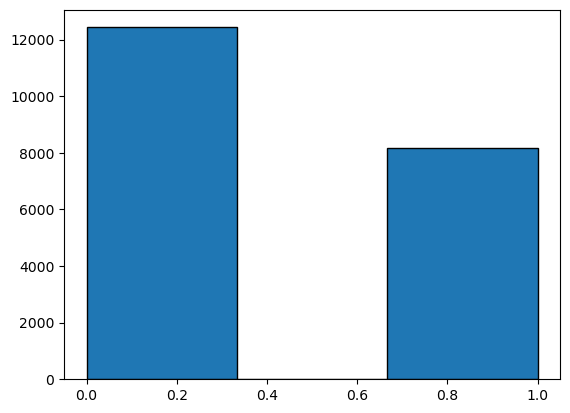

In [41]:
plt.hist(df_cleaned['Sex'], bins=3, edgecolor='black')

In [14]:
print(df['Sex'].value_counts())

Sex
Male      12437
Female     8156
Name: count, dtype: int64


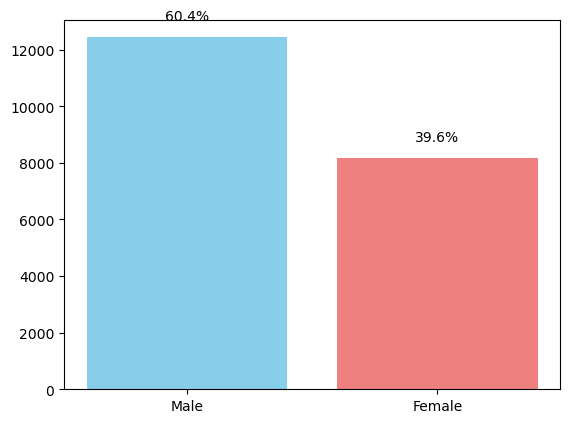

In [43]:
counts={'Male': 12437, 'Female': 8156}
labels = list(counts.keys())
values=list(counts.values())

total = sum(values)
proportions = [v / total for v in values]

colours=['skyblue', 'lightcoral']
fig, ax = plt.subplots()

bars = ax.bar(labels, values, color=colours)

for bar, prop in zip(bars, proportions):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 500, f'{prop:.1%}', ha='center', va='bottom')

plt.show()


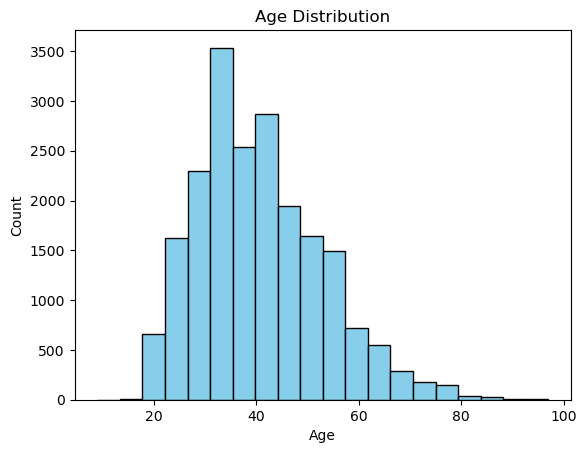

In [44]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

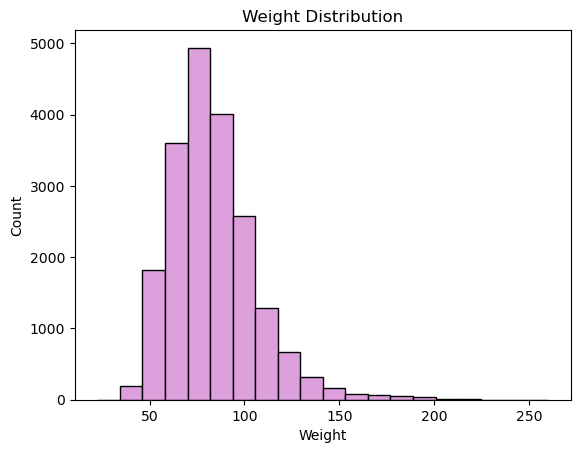

In [28]:
plt.hist(df['weight'], bins=20, color='plum', edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

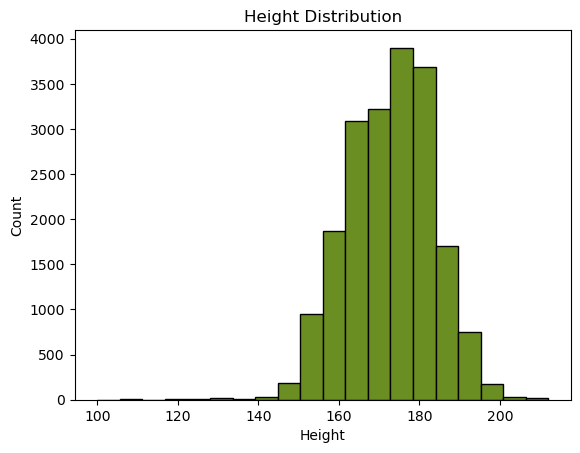

In [30]:
plt.hist(df['height'], bins=20, color='olivedrab', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

TableOne

In [32]:
from tableone import TableOne

In [55]:

columns = [
    'EQ5D_Round1', 'Age', 'Sex', 'occupation', 'weight', 'height',
    'adverse_binary', 'GAD7_Round1', 'insomniaEfficacyMeasure_Round1'
]

categorical=['Sex', 'occupation', 'adverse_binary']
groupby='Sex'

table1 = TableOne(data=df, columns=columns, categorical=categorical, groupby=groupby, pval=True)

print(table1)

                                            Grouped by Sex                                                   
                                                   Missing       Overall              0             1 P-Value
n                                                                  20593          12437          8156        
EQ5D_Round1, mean (SD)                                   0     0.4 (0.3)      0.4 (0.3)     0.3 (0.3)  <0.001
Age, mean (SD)                                           0   40.6 (12.3)    40.5 (11.6)   40.8 (13.3)   0.042
Sex, n (%)                                0                 12437 (60.4)  12437 (100.0)       0 (0.0)  <0.001
                                          1                  8156 (39.6)        0 (0.0)  8156 (100.0)        
occupation, n (%)                         0                  7152 (34.7)    4046 (32.5)   3106 (38.1)  <0.001
                                          1                 12624 (61.3)    7968 (64.1)   4656 (57.1)        
          

In [59]:

table1.to_csv("table1.csv") 



In [47]:
df.columns.tolist()

['SID',
 'EQ5D_Round1',
 'EQ5D_Round2',
 'EQ5D_Round3',
 'EQ5D_Round4',
 'EQ5D_Round5',
 'EQ5D_Round6',
 'Age',
 'Sex',
 'occupation',
 'weight',
 'height',
 'Myocardial_infarction',
 'Congestive_heart_failure',
 'Peripheral_vascular_disease',
 'Cerebrovascular_accident_or_transient_ischemic_attack',
 'Dementia',
 'Chronic_obstructive_pulmonary_disease',
 'Connective_tissue_disease',
 'Peptic_Ulcer_Disease',
 'Liver_disease',
 'Diabetes',
 'Hemiplegia',
 'Moderate_to_severe_chronic_kidney_disease',
 'Solid_tumour',
 'Leukemia',
 'Lymphoma',
 'AIDS',
 'Charlson_comorbidity',
 'Hypertension',
 'Depression_or_anxiety',
 'Arthritis',
 'Epilepsy',
 'VTE',
 'Endocrine_thyroid_dysfunction',
 'Allergy',
 'Smoking_status',
 'Smoking_pack_years',
 'alcohol_units',
 'Cannabis_status',
 'GAD7_Round1',
 'insomniaEfficacyMeasure_Round1',
 'diag_Depression',
 'diag_Anxiety',
 'diag_Chronic pain',
 'diag_Osteoarthritis',
 'diag_PTSD',
 'diag_Fibromyalgia',
 'diag_Multiple sclerosis',
 'diag_Neuropathi

In [60]:
df['occupation'].value_counts()

occupation
1    12624
0     7152
2      817
Name: count, dtype: int64